# Segmente-Anything

O SAM (SEGMENT-ANYTHING MODEL) é um modelo de Deep Learning criado pela META (FACEBOOK). Este modelo foi criado e treinado em milhões de imagens para a segmentação de qualquer tipo de imagem.

Nesta secção teremos o nosso voluntário Gilberto, que nos aparece nas urgência com uma dor de barriga e de peito. Teremos de segmentar o seu estomago, intestino e coração nas imagens médicas para passarmos os dados relevantes ao médico.

Começaremos por correr a 1ª célula para montar o nosso SAM. Na 2ª célula podem alterar as seguintes linhas para escolher as coordenadas do orgão a segmentar:

## REWRITE
```
image_path = "/content/drive/MyDrive/Colab Notebooks/body.jpeg" # choose image path

input_point = np.array([[600, 500]]) # choose point(s)

input_label = np.array([1]) # chose label(s)
```
Podem Também escolher uma outra imagem alterando o caminho (image_path).

Para verem o resultado final basta correrem a 3ª célula.

Divirtam-se!!
E ajudem o Gilberto a ter o melhor cuidado médico.


In [ ]:
# this is the part which takes time
!git clone https://github.com/QBioImaging/UAlg-Open-Day-2025.git
!pip install UAlg-Open-Day-2025/
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

import sys
sys.path.append("UAlg-Open-Day-2025/")

from segment_anything import sam_model_registry, SamPredictor
from SAM_utils import show_mask, show_points, show_box

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

PyTorch version: 2.5.1+cu124
Torchvision version: 0.20.1+cu124
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ko8uti42
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ko8uti42
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
mkdir: cannot create directory ‘images’: File exists
--2025-02-24 20:13:36--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271475 (265K) [image/jpeg]
Saving to: ‘images/truck.jpg.5

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

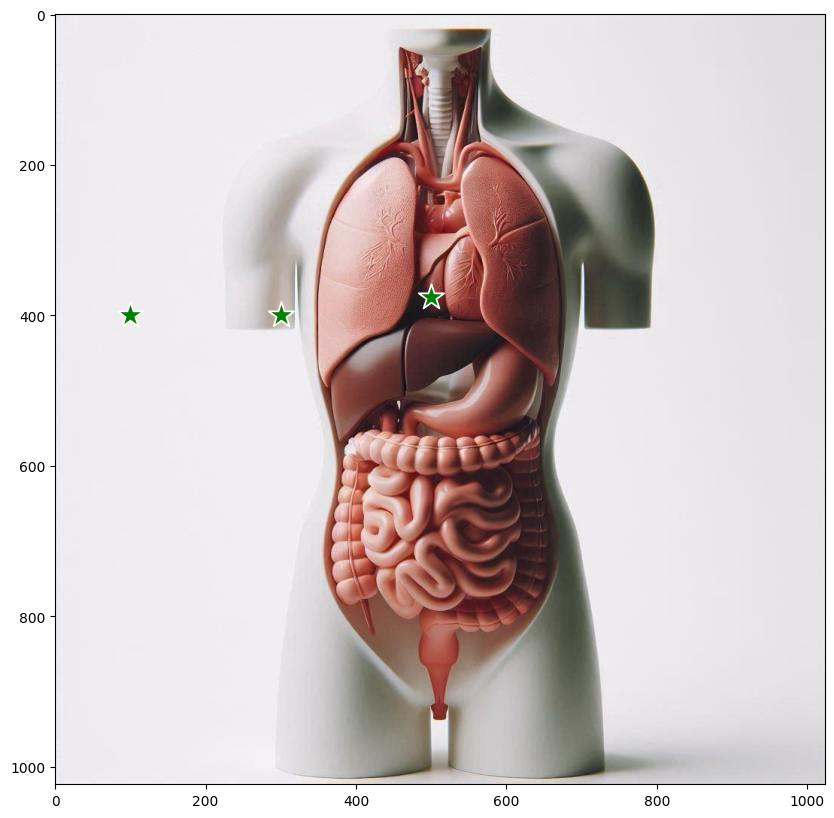

In [ ]:
image_path = "UAlg-Open-Day-2025/assets/sam/body.jpeg"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# cordenadas dos pontos pretendidos
# 1 pt np.array([[x, y]])
# 2 pts np.array([[x, y], [x, y]]), etc..
input_point = np.array([[500, 375]])

# número de rótulos = número de pontos
# 1 pt np.array([1])
# 2 pts np.array([1, 1]), etc..
input_label = np.array([1])

predictor = SamPredictor(sam)
predictor.set_image(image)

# show figure
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [26]:
input_point = np.array([[500, 375]])
print(input_point.shape)

(1, 2)


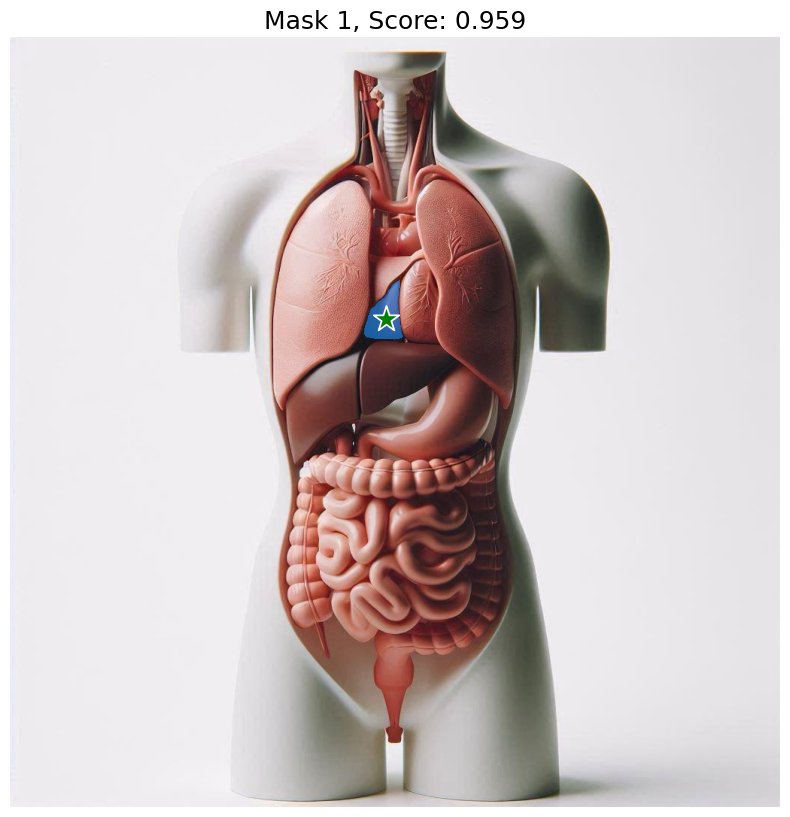

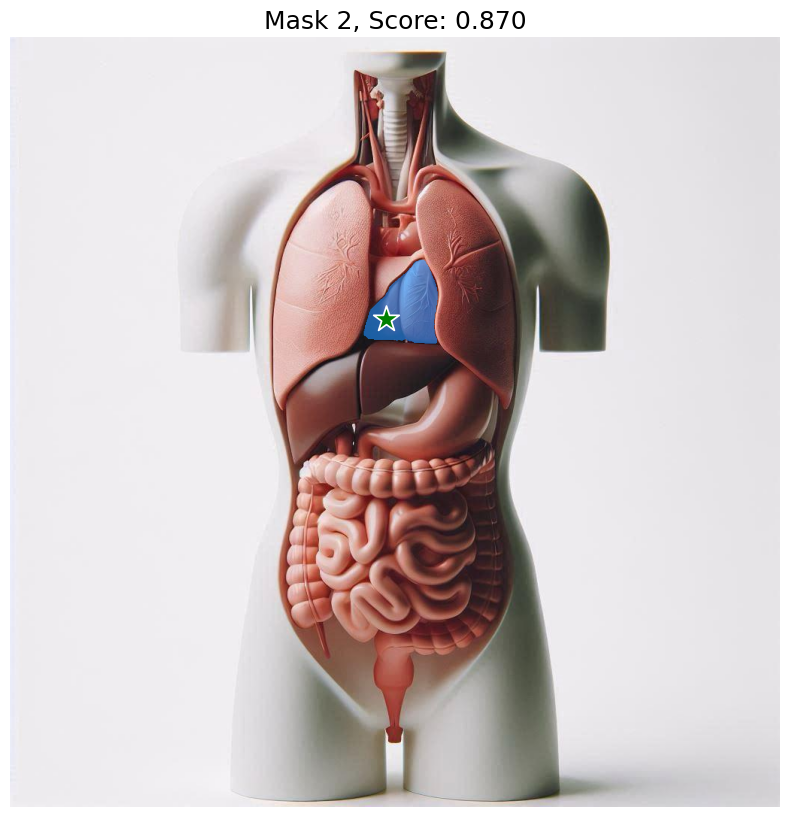

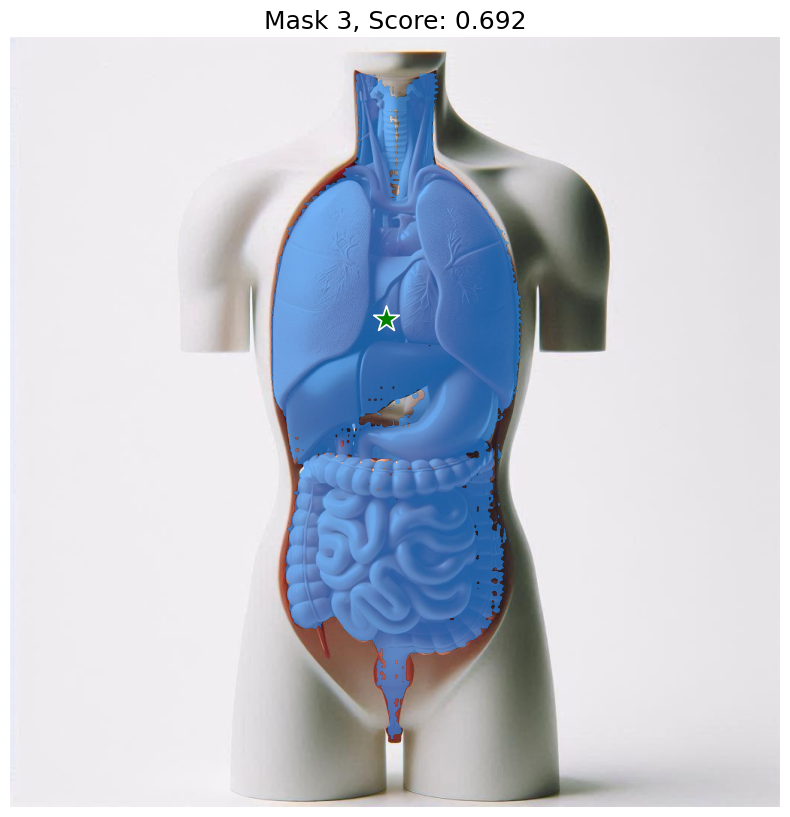

In [17]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# show predictions
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()